# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r"C:\Users\akars\OneDrive\Desktop\5th SEM\DATA VISUALIZATION, ANALYTICS\LAB\DataSet\Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Feature Selection & Data Normalization

In [3]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
wcss_list = []
silhouette_scores = []

In [5]:
for i in range(2,11):
    kmeans_test = KMeans (n_clusters = i,init = 'k-means++', random_state= 0)
    kmeans_test.fit(x_scaled)
    wcss_list.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans_test.labels_))

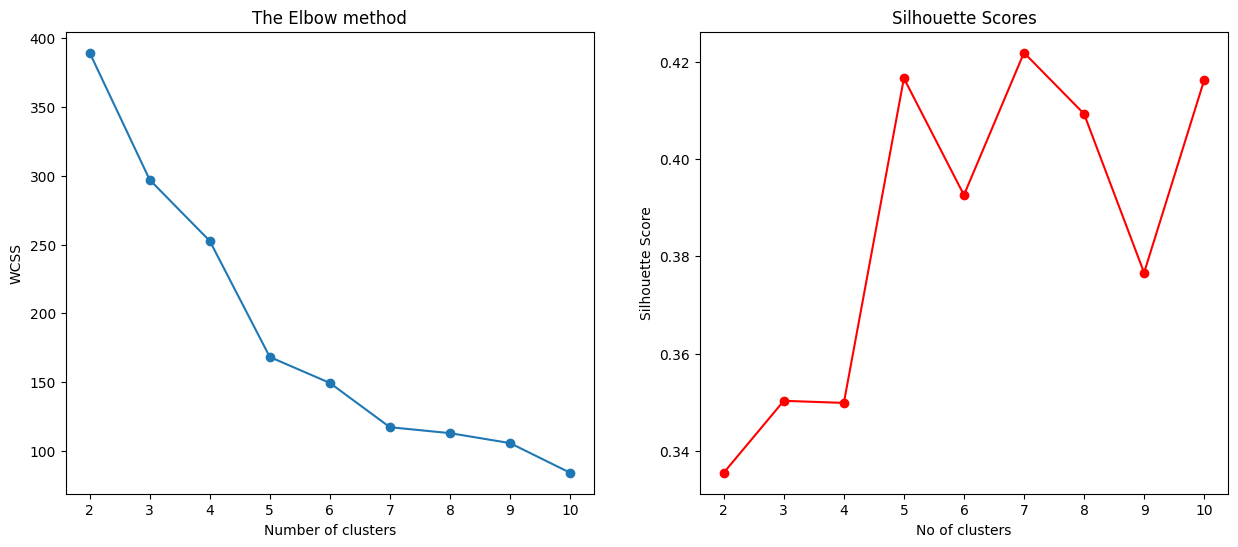

In [6]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(range(2,11),wcss_list,marker='o')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2,11))
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,11),silhouette_scores,marker='o',color='red')
plt.title('Silhouette Scores')
plt.xlabel('No of clusters')
plt.xticks(np.arange(2,11))
plt.ylabel('Silhouette Score')
plt.show()

# Applying K-Means Clustering

In [10]:
optimal_clusters = 5
kmeans =  KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x_scaled)

# Visualization

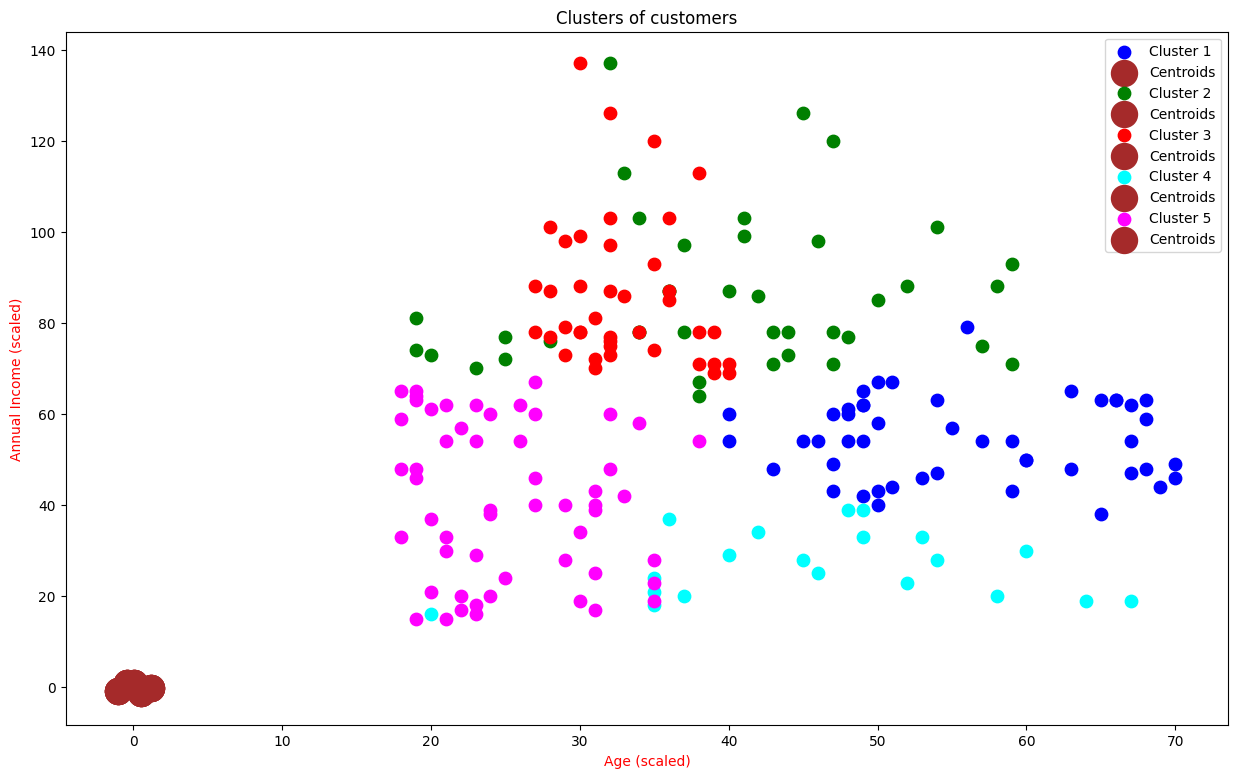

In [9]:
plt.figure(1, figsize=(15, 9))
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s =80, c = colors[i], label = 'Cluster {}'.format(i+1))
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 350, c = 'brown', label = 'Centroids')
    plt.title('Clusters of customers')
    plt.xlabel('Age (scaled)', color = 'red')
    plt.ylabel('Annual Income (scaled)', color = 'red')
    plt.legend()
plt.show()

# Spending Score Distribution across Clusters

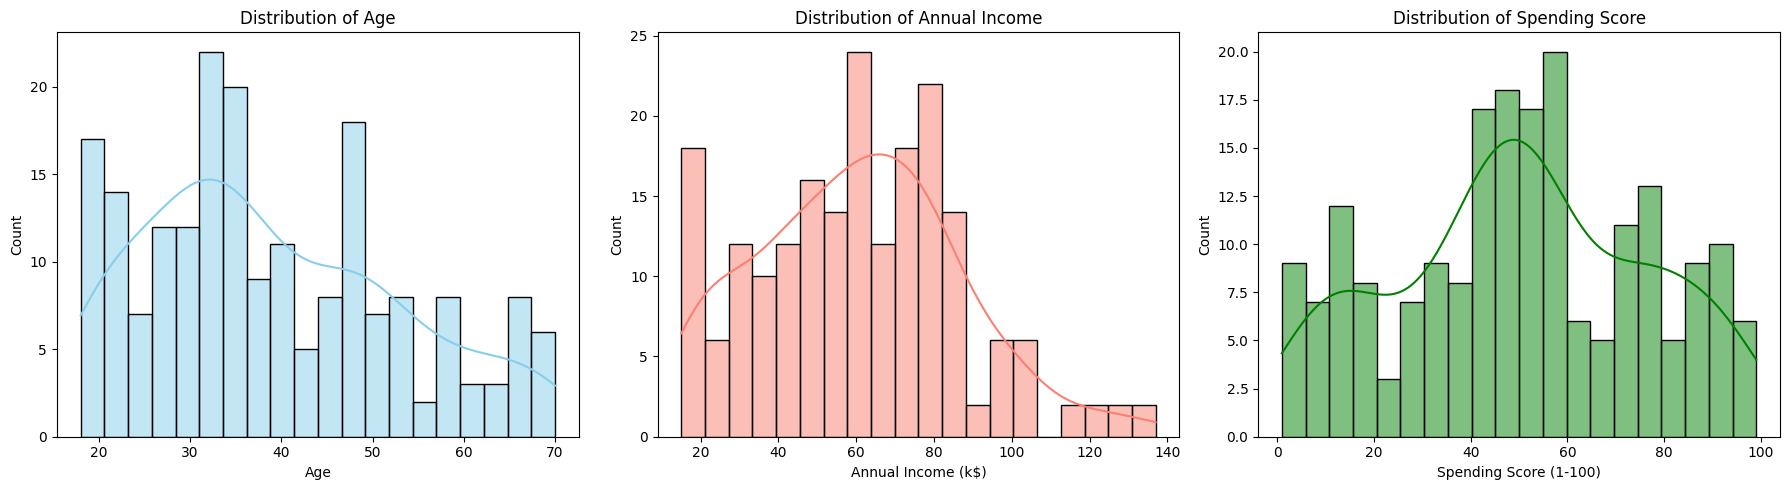

In [8]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
sns.histplot(df, x='Annual Income (k$)', bins=20, kde=True, color='salmon')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.histplot(df, x='Spending Score (1-100)', bins=20, kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()